In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 

pd.set_option('max_columns', 99)

%matplotlib inline

### Lets use fetch_20newsgroups to load the data - let's chose two categories per the [sklearn userguide](https://scikit-learn.org/stable/datasets/index.html#newsgroups-dataset)

In [19]:
### code 
cats = ['soc.religion.christian', 'talk.religion.misc']

## get documents from the appropriate categories 
ng = fetch_20newsgroups(categories=cats)

## I like having the target column be a string value in many cases 
y_str = [ng.target_names[i] for i in ng.target]

df = pd.DataFrame({'Text':ng.data, 'Target':y_str})

df.head()

,Text,Target
0,From: rsteele@adam.ll.mit.edu (Rob Steele)\nSu...,soc.religion.christian
1,"Subject: Re: After 2000 years, can we say that...",talk.religion.misc
2,From: max@hilbert.cyprs.rain.com (Max Webb)\nS...,soc.religion.christian
3,From: weinss@rs6101.ecs.rpi.edu (Stephen Andre...,talk.religion.misc
4,From: emarsh@hernes-sun.Eng.Sun.COM (Eric Mars...,talk.religion.misc


### Train test split our data - then instantiate a countvectorizer object and look for potential stopwords

In [20]:
## Instantiate a countvectorizer object - fit transform and then put the results in a dataframe 
stops = list(ENGLISH_STOP_WORDS) + ['edu', 'com', 'subject']

X_train, X_test, y_train, y_test = train_test_split(df['Text'], \
                                                   df['Target'], \
                                                   random_state=13326)

cv = CountVectorizer(min_df=3, stop_words=stops, ngram_range=(1,1))

X_train_vect = cv.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train_vect.todense(), columns = cv.get_feature_names())


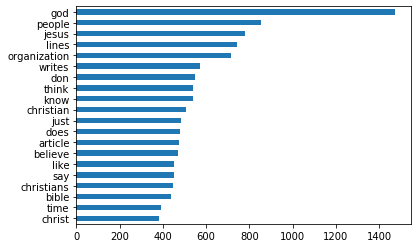

In [21]:
X_train_df.sum().sort_values().tail(20).plot.barh();

### How can we build a plot displaying the most frequently occuring words? 

### Add stopwords to our vectorizer - any other parameters we could tune?

### Let's run a Logistic Regression and look at a confusion matrix of our results 

In [22]:
lr = LogisticRegression(solver='lbfgs')

X_test_vect = cv.transform(X_test)

X_test_df = pd.DataFrame(X_test_vect.todense(),\
                         columns=cv.get_feature_names())

lr.fit(X_train_df, y_train)

lr.score(X_test_df, y_test)

0.9795081967213115

In [23]:
preds = lr.predict(X_test_df)

In [24]:
cols = 'Pred: ' + lr.classes_
rows = 'Actual ' + lr.classes_ 
pd.DataFrame(confusion_matrix(y_test, preds), columns=cols, index=rows)

,Pred: soc.religion.christian,Pred: talk.religion.misc
Actual soc.religion.christian,154,1
Actual talk.religion.misc,4,85


### Analyze the coefs of our Logistic Regression 

In [25]:
lr.classes_

array(['soc.religion.christian', 'talk.religion.misc'], dtype=object)

In [26]:
import numpy as np
np.e**-.8

0.44932896411722156

In [27]:
X_train.loc[643]

'From: johnsd2@rpi.edu (Dan Johnson)\nSubject: Re: "Accepting Jeesus in your heart..."\nReply-To: johnsd2@rpi.edu\nOrganization: not Sun Microsystems\nLines: 45\n\nIn article 29201@athos.rutgers.edu, seanna@bnr.ca (Seanna (S.M.) Watson) writes:\n>In article <Apr.14.03.07.38.1993.5420@athos.rutgers.edu> johnsd2@rpi.edu writes:\n>>In article 28388@athos.rutgers.edu, jayne@mmalt.guild.org (Jayne Kulikauskas) writes:\n>>\n>>>  This is why the most effective \n>>>substance-abuse recovery programs involve meeting peoples\' spiritual \n>>>needs.\n>>\n>>You might want to provide some evidence next time you make a claim\n>>like this.\n>>\n>In 12-step programs (like Alcoholics Anonymous), one of the steps\n>involves acknowleding a "higher power".  AA and other 12-step abuse-\n>recovery programs are acknowledged as being among the most effective.\n\n[deletia- and so on]\n\nI seem to have been rather unclear.\n\nWhat I was asking is this:\n\nPlease show me that the most effective substance-absure 

In [28]:
X_train_df.iloc[:, 900:1000]

,bumper,bunch,burden,burdensome,bureau,burial,buried,burn,burned,burning,burns,burnt,burrill,bush,business,busy,butler,buy,buying,bye,byler,byu,byuvm,c5muiw,c5slas,ca,caldwell,california,called,calling,calls,calvin,cambridge,came,campbell,campus,camtec,canada,canadian,canon,capable,capacity,capital,captialist,car,caralv,carcs1,cardenas,cardinal,...,careful,carefully,cares,caring,carleton,carnegie,carol,carolina,carpenter,carried,carrier,carries,carry,carrying,case,cases,casper,cast,catagory,categories,category,catholic,catholicism,catholics,cattle,caught,causal,cause,caused,causes,causing,cautious,cavano,cb,cbnewsj,cbnewsk,cc,ccc,cd,cdcolvin,ce,cease,ceccarelli,celebrate,celebrated,celebrating,celebration,cell,cent
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
lr.classes_

array(['soc.religion.christian', 'talk.religion.misc'], dtype=object)

In [30]:
y_test.value_counts()

soc.religion.christian    155
talk.religion.misc         89
Name: Target, dtype: int64

In [31]:
np.e ** coef_df.sort_values('ABS').tail().loc['rutgers'][0]

2.2427435925493104

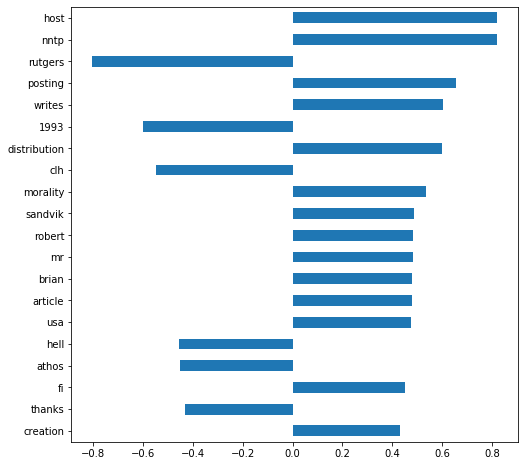

In [32]:
### negative coeffs make our model more likely to predict class `soc.religion.christian`

fig , ax = plt.subplots(figsize=(8,8))

coef_df = pd.DataFrame(lr.coef_, columns=cv.get_feature_names()).T
coef_df['ABS'] = coef_df[0].abs()
coef_df.sort_values('ABS').tail(20).loc[:,0].plot.barh(ax=ax);

In [33]:
### let's do the same as above but move it into a function:
## Instantiate a countvectorizer object - fit transform and then put the results in a dataframe 
stops = list(ENGLISH_STOP_WORDS) + ['edu', 'com', 'subject']


def run_lrmodel_view_coef(ngram__range, min__df):

    cv = CountVectorizer(min_df=min__df, stop_words=stops, ngram_range=ngram__range)

    X_train_vect = cv.fit_transform(X_train)
    lr = LogisticRegression(solver='lbfgs')
    
    X_test_vect = cv.transform(X_test)

    lr.fit(X_train_vect, y_train)
    preds = lr.predict(X_test_vect)    
        
    print(f"accuracy score: {lr.score(X_test_vect, y_test)}")
    cols = 'Pred: ' + lr.classes_
    rows = 'Actual ' + lr.classes_ 
    
    display(pd.DataFrame(confusion_matrix(y_test, preds), columns=cols, index=rows))
    
    fig , ax = plt.subplots(figsize=(8,8))
        
    coef_df = pd.DataFrame(lr.coef_, columns=cv.get_feature_names()).T
    coef_df['ABS'] = coef_df[0].abs()
    coef_df.sort_values('ABS').tail(20).loc[:,0].plot.barh(ax=ax);

accuracy score: 0.9631147540983607


,Pred: soc.religion.christian,Pred: talk.religion.misc
Actual soc.religion.christian,80,9
Actual talk.religion.misc,0,155


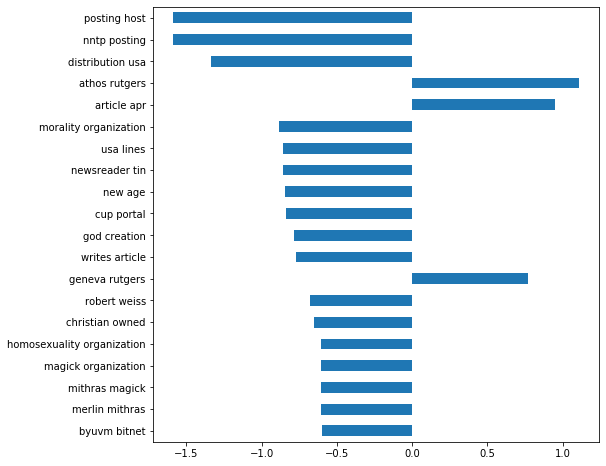

In [17]:
run_lrmodel_view_coef(ngram__range=(2,2), min__df=4)